## 1 How Models Work
### Step 1: Loading Data

**[Simplest Possible Decision Tree 의 예시]**
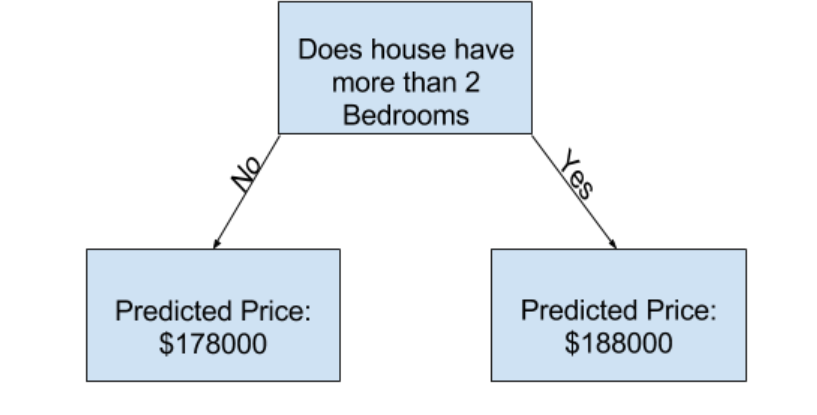
* 주택을 다음과 같이 두가지 카테고리로 나눈 후 해당 카테고리에 속하는 주택의 예측가격은 해당 카테고리의 과거 평균 가격을 사용함
* 카테고리를 나누고 각 그룹의 예측가격을 결정하는 과정에서 데이터를 활용하며 이를 모델을 **훈련**시킨닿고 말함. 모델을 학습하기 위해 사용된 데이터를 훈련데이터라고 말함



**[Improving Decision Tree 의 예시]**
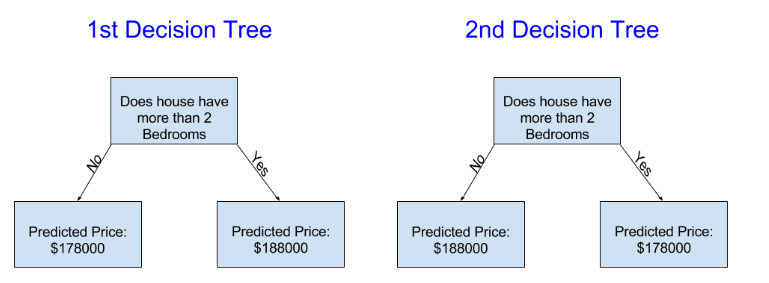

* 해당 모델의 가장 큰 단점은 욕실 수, 크기, 위치 등이 주택 가격에 영향을 미치는 것을 반영하지 못한다는 점
* 이를 위해 **deeper** tree 을 만들어보면
 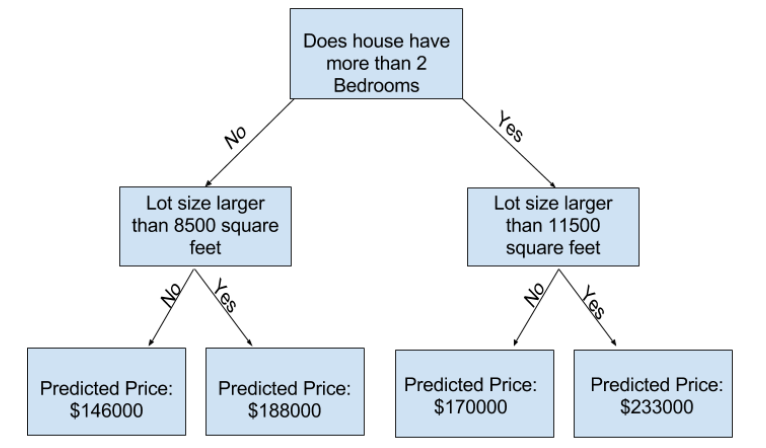

이때 다음과 같이 tree의 맨 아래에 있는 것을 leaf라고 하는데 이를 통해 우리는 prediction을 만들어냄

## 2 Basic Data Exploration
### Step 1: Loading Data

In [7]:
import pandas as pd

# Path of the file to read
iowa_file_path = "C:/Users/sshyu/OneDrive/바탕 화면/Euron/DL세션/housingprice_train.csv"

# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv(iowa_file_path)

### Step 2: Review The Data

In [8]:
# 데이터 확인하기
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# 데이터 타입 확인하기
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# 데이터 기술통계량 확인하기
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
# 데이터 크기 확인하기
home_data.shape

(1460, 81)

In [20]:
# 누락된 값 확인
home_data.isnull().sum()
# 데이터의 누락된 값은 여러가지 이유로 발생할 수 있음
# 예를 들어 침실이 한개인 집을 조사할 때는 두번째 침실의 크기를 기록하지 않기 때문에
# 누락이 발생함

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [16]:
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = round(home_data['LotArea'].mean(),0)
print(avg_lot_size)

# As of today, how old is the newest home (current year - the date in which it was built)
from datetime import datetime
currentyear=datetime.today().year
newest_home_age = currentyear-home_data['YearBuilt'].max()
print(newest_home_age)

10517.0
14


## 3 Your First Machine Learning Model

In [34]:
import pandas as pd

melbourne_file_path = "C:/Users/sshyu/OneDrive/바탕 화면/Euron/DL세션/melb_data.csv"
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [35]:
# melbourne 데이터의 missing value 확인하기
melbourne_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [36]:
# missing value drop 하기
melbourne_data = melbourne_data.dropna(axis=0)

In [37]:
# dot-notation을 통해 나온 single coulmn은 series 형태임
# prediction target y 설정하기
y=melbourne_data.Price

In [38]:
# Feature 선택하기
# home price을 결정할 것 같은 칼럼들 (이때 y 제외해야 함)
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [39]:
# feature date을 X라고 함
X = melbourne_data[melbourne_features]

In [40]:
# feature data 확인해보기
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [41]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [42]:
# 모델 만들기
# 이때 5가지 step; 
## 1 Define 어떤 모델인지 설정
## 2 Fit 모델에 데이터 학습시키기
## 3 Predict 학습된 모델을 통해 예측값 만들기
## 4 Evaluate 모델 예측값이 얼마나 정확한지 확인
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [43]:
# 이때 random_state을 활용하여 매번 run 할 때마다 같은 결과값이 나오도록 함
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [44]:
# print the list of columns in the dataset to find the name of the prediction target
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [45]:
# home data의 target 변수 설정하기
y = home_data['SalePrice']

In [46]:
# home 데이터의 feature 변수 설정하기
# Create the list of features below
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names]

In [47]:
# Review data
# print description or statistics from X
print(X.describe())

# print the top few lines
print(X.head())

             LotArea    YearBuilt     1stFlrSF     2ndFlrSF     FullBath  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082  1971.267808  1162.626712   346.992466     1.565068   
std      9981.264932    30.202904   386.587738   436.528436     0.550916   
min      1300.000000  1872.000000   334.000000     0.000000     0.000000   
25%      7553.500000  1954.000000   882.000000     0.000000     1.000000   
50%      9478.500000  1973.000000  1087.000000     0.000000     2.000000   
75%     11601.500000  2000.000000  1391.250000   728.000000     2.000000   
max    215245.000000  2010.000000  4692.000000  2065.000000     3.000000   

       BedroomAbvGr  TotRmsAbvGrd  
count   1460.000000   1460.000000  
mean       2.866438      6.517808  
std        0.815778      1.625393  
min        0.000000      2.000000  
25%        2.000000      5.000000  
50%        3.000000      6.000000  
75%        3.000000      7.000000  
max        8.000000     14.

In [49]:
# from _ import _
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
from sklearn.tree import DecisionTreeRegressor
iowa_model = DecisionTreeRegressor(random_state=0)

# Fit the model
iowa_model.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [50]:
predictions = iowa_model.predict(X)
print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [51]:
# Think About Your Results
print(iowa_model.predict(X.head()))
print(list(y.head()))

[208500. 181500. 223500. 140000. 250000.]
[208500, 181500, 223500, 140000, 250000]


## 4 Model Validation

- 모델의 품질을 평가하는 중요한 측정 기준
- 모델의 예측이 실제 결과와 얼마나 가까운지 평가
- 이때 사람들이 주로 하는 실수는 **훈련데이터**를 사용하여 예측을 한 후, 그 예측값을 훈련데이터의 목표값가 비교하는 것임
- 지금 사용할 측정 지표는 Mean Absoulte Error

In [52]:
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing price values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.tree import DecisionTreeRegressor
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(X, y)
DecisionTreeRegressor()

DecisionTreeRegressor()

In [54]:
# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices).item()

434.71594577146544

In [56]:
# 이 측정값을 in-sample 점수라고 함
# 하지만 이때의 문제는 새로운 데이터에 적용되지 않았기 때문에 부정확할 수 있음
## 예를 들어 큰 문색깔이 주택 가격과 관련이 없다고 가정을 했을 때
## 모델에서 아용한 샘플 데이터에서는 초록색 문을 가진 집들이 모두 비쌌다고 가정을 하면
## 모델을 이 패턴을 감지하고 초록샘 문을 가진 집들에 대해 항상 높은 가격을 예측할 것

## 따라서 train 데이터와 test 데이터를 나누어 주어야 함
from sklearn.model_selection import train_test_split
## 이때 train_test_split 함수의 디폴트 값은 0.25로 train 과 test를 3:1 비율로 나눔
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

259139.44673983214


In [60]:
home_data = pd.read_csv(iowa_file_path)
# target 변수 생성
y = home_data.SalePrice
# feature 변수 생성
feature_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[feature_columns]

# Specify Model
iowa_model = DecisionTreeRegressor()
# Fit Model
iowa_model.fit(X, y)

print("First in-sample predictions:", iowa_model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())

First in-sample predictions: [208500. 181500. 223500. 140000. 250000.]
Actual target values for those homes: [208500, 181500, 223500, 140000, 250000]


In [62]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split

# fill in and uncomment
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=1)

In [64]:
# You imported DecisionTreeRegressor in your last exercise
# and that code has been copied to the setup code above. So, no need to
# import it again
from sklearn.tree import DecisionTreeRegressor
# Specify the model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit iowa_model with the training data.
iowa_model.fit(train_X,train_y)


DecisionTreeRegressor(random_state=1)

In [65]:
# Predict with all validation observations
val_predictions = iowa_model.predict(val_X)

In [66]:
# Inspect your predictions and actual values from validation data.
# print the top few validation predictions
print(iowa_model.predict(val_X)[:5])
# print the top few actual prices from validation data
print(list(val_y[:5]))

[186500. 184000. 130000.  92000. 164500.]
[231500, 179500, 122000, 84500, 142000]


In [67]:
# Calculate the Mean Absolute Error in Validation Data

from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y,val_predictions)

# uncomment following line to see the validation_mae
print(val_mae)

29652.931506849316


## 5 Underfitting and Overfitting
-  실제로 트리가 10 단계까지 나뉘는 경우는 드물지 않음
-  트리가 깊어질 수록 데이터셋은 더 작은 leaf로 나뉘게 됨
-  만약 10단계로 나누면, 2^10개의 그룹이 되는 것!
-  많은 리프가 생기면, 각 리프에는 적은 수의 집들만 남게 됨. 리프에 집이 아주 적으면 그 리프에서의 예측은 실제 값과 매우 가까울 수 있지만, 새로운 데이터에 대해서는 예측이 몇개의 집만을 기준으로 하기 때문에 신뢰할 수 없는 예측을 할 수 있음

***이러한 현상을 Overfitting 이라고함***


- 훈련 데이터에는 거의 완벽하게 맞추지만 검증 데이터나 다른 새로운 데이터 분석에서는 성능이 좋지 않은 경우임
- 하지만 반대로 트리를 매우 얕게 만들면 집들을 매우 구체적인 그룹으로 나누지 않음
- 극단적으로 트리가 집들을 2개 또는 4개의 그룹으로만 나누게 되면, 각 그룹에는 여전히 다양한 집들이 포함됨
- 이러한 경우 훈련 데이터에서도 대부분의 집에 대해 예측이 크게 벗어날 수 있음

***이러한 현상을 Underfitting 이라고함***

**따라서 과적합과 과소적합 사이의 적절한 균형을 찾는 것이 중요함**

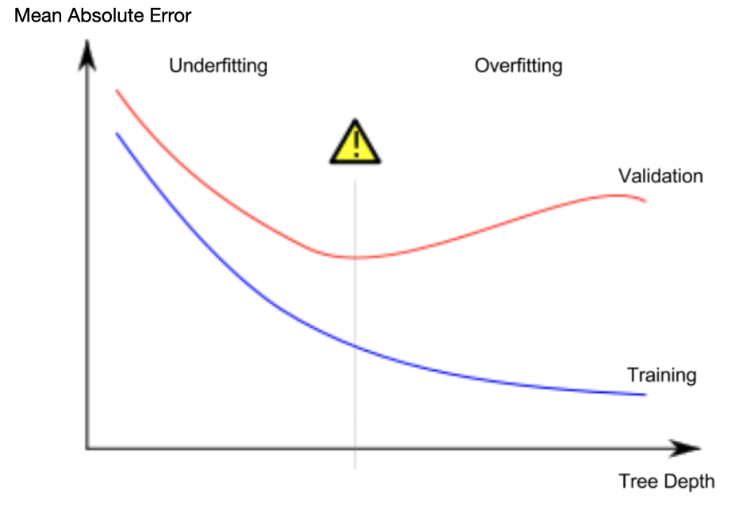

In [68]:
# 트리의 깊이는 제어하는 대안 중 하나인 max_leaf_nodes를 통해 과적합/과소적합 제어
# 우리가 모델이 만들 수 있는 리프의 수를 더 많이 허용할 수록
# 위 그래프에서 과소적합 영역에서 과적합 영역으로 이동하게 됨
# 다양한 max_leaf_nodes값에 대해 MAE 점수를 비교하여 확인

from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [69]:
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [70]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  255575


따라서 가장 적절한 Max leaf nodes는 MAE가 가장 작은 500일 때라는 것을 알 수 있음

In [76]:
home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 29,653


DecisionTreeRegressor의 max_leaf_nodes 디폴트값은 None

즉, 기본적으로 리프 노드의 수에 대한 제한이 없으며, 결정 트리는 가능한 한 많은 리프 노드를 생성함

리프 노드의 수를 제한하려면 max_leaf_nodes에 원하는 값을 지정해야 함

In [77]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
mae_dic={}
for ideal in candidate_max_leaf_nodes:
    my_mae=get_mae(ideal, train_X, val_X, train_y, val_y)
    mae_dic[ideal]=my_mae

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(mae_dic,key=mae_dic.get)

In [78]:
mae_dic

{5: np.float64(35044.51299744237),
 25: np.float64(29016.41319191076),
 50: np.float64(27405.930473214907),
 100: np.float64(27282.50803885739),
 250: np.float64(27893.822225701646),
 500: np.float64(29454.18598068598)}

In [79]:
best_tree_size

100

In [84]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(random_state=0,max_leaf_nodes=best_tree_size)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)

## 6 Random Forests


- DecisionTree는 깉은 트리와 많은 리프를 가진 경우 과적합이 발생하고, 반대로 얕은 트리와 적은 리프를 가진 경우는 데이터의 디테일을 충분히 확인하지 못하기 때문에 성능이 저하될 수 있음
- Random Forest는 많은 결정 트리를 사용하고 각 트리의 예측을 평균내어 최종 예측을 만듦
- 일반적으로 Single DecisionTree 보다 예측 정확도가 훨씬 뛰어나고 기본 파라미터로도 잘 작동함

In [85]:
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191669.7536453626


In [87]:
home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))


Validation MAE when not specifying max_leaf_nodes: 29,653
Validation MAE for best value of max_leaf_nodes: 27,283


In [88]:
# Random Forest 모델 활용해보기
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X,train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_predictions=rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 21857.15912981083
